# 데이터

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv('./data.csv')
Data

,date,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,...,q_ar5,q_ar6,q_ar7,r_ar1,r_ar2,r_ar3,r_ar4,r_ar5,r_ar6,r_ar7
0,2019-07-01 00:00:00+09:00,0.0,0.0,-29.27220,24.0,1.6,252.0,80.0,3.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-01 01:00:00+09:00,0.0,0.0,-29.40307,23.7,1.5,253.7,81.7,3.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-01 02:00:00+09:00,0.0,0.0,-26.39168,23.3,1.4,255.3,83.3,3.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-01 03:00:00+09:00,0.0,0.0,-20.49290,23.0,1.3,257.0,85.0,3.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-01 04:00:00+09:00,0.0,0.0,-12.50007,23.0,1.2,254.3,85.0,3.0,13.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,2020-07-31 19:00:00+09:00,NaN,NaN,6.15018,27.3,1.9,233.7,81.7,4.0,50.0,...,0.233,1.434,0.503,NaN,NaN,0.12,0.25,0.20,0.23,0.25
9524,2020-07-31 20:00:00+09:00,NaN,NaN,-4.50392,26.7,1.7,219.3,83.3,4.0,40.0,...,0.000,0.004,0.012,NaN,NaN,0.09,0.11,0.09,0.09,0.07
9525,2020-07-31 21:00:00+09:00,NaN,NaN,-15.01526,26.0,1.4,205.0,85.0,4.0,30.0,...,0.000,0.000,0.000,NaN,NaN,0.00,0.00,0.00,0.00,0.00
9526,2020-07-31 22:00:00+09:00,NaN,NaN,-23.49217,25.7,1.3,203.3,86.7,4.0,30.0,...,0.000,0.000,0.000,NaN,NaN,0.00,0.00,0.00,0.00,0.00


In [3]:
Data['date'] = pd.to_datetime(Data['date'])

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype                                
---  ------                  --------------  -----                                
 0   date                    9528 non-null   datetime64[ns, pytz.FixedOffset(540)]
 1   quantity                9408 non-null   float64                              
 2   radiation               9466 non-null   float64                              
 3   altitude                9528 non-null   float64                              
 4   pre_temperature         8806 non-null   float64                              
 5   pre_wind_speed          8806 non-null   float64                              
 6   pre_wind_direction      8806 non-null   float64                              
 7   pre_humidity            8806 non-null   float64                              
 8   pre_cloud               8806 non-null   float64           

In [5]:
Data.isna().sum()

date                        0
quantity                  120
radiation                  62
altitude                    0
pre_temperature           722
pre_wind_speed            722
pre_wind_direction        722
pre_humidity              722
pre_cloud                 722
pre_rain                  722
radiation_st_mean           0
radiation_st_quantile1      0
radiation_st_quantile2      0
radiation_st_quantile3      0
quantity_st_mean            0
quantity_st_quantile1       0
quantity_st_quantile2       0
quantity_st_quantile3       0
radiation_ct_mean         722
radiation_ct_quantile1    722
radiation_ct_quantile2    722
radiation_ct_quantile3    722
quantity_ct_mean          722
quantity_ct_quantile1     722
quantity_ct_quantile2     722
quantity_ct_quantile3     722
q_ar1                     120
q_ar2                     120
q_ar3                     144
q_ar4                     168
q_ar5                     192
q_ar6                     216
q_ar7                     240
r_ar1     

In [6]:
Data[Data.quantity.isna()==True]

,date,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,...,q_ar5,q_ar6,q_ar7,r_ar1,r_ar2,r_ar3,r_ar4,r_ar5,r_ar6,r_ar7
5136,2020-01-31 00:00:00+09:00,NaN,0.0,-68.34425,3.0,0.8,40.0,70.0,3.0,20.0,...,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00
5137,2020-01-31 01:00:00+09:00,NaN,0.0,-70.29034,2.7,0.8,38.0,73.3,3.0,23.3,...,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00
5138,2020-01-31 02:00:00+09:00,NaN,0.0,-64.28199,2.3,0.7,36.0,76.7,3.0,26.7,...,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00
5139,2020-01-31 03:00:00+09:00,NaN,0.0,-54.24068,2.0,0.7,34.0,80.0,4.0,30.0,...,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00
5140,2020-01-31 04:00:00+09:00,NaN,0.0,-42.54358,1.7,0.7,41.3,81.7,4.0,30.0,...,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,2020-07-31 19:00:00+09:00,NaN,NaN,6.15018,27.3,1.9,233.7,81.7,4.0,50.0,...,0.233,1.434,0.503,NaN,NaN,0.12,0.25,0.20,0.23,0.25
9524,2020-07-31 20:00:00+09:00,NaN,NaN,-4.50392,26.7,1.7,219.3,83.3,4.0,40.0,...,0.000,0.004,0.012,NaN,NaN,0.09,0.11,0.09,0.09,0.07
9525,2020-07-31 21:00:00+09:00,NaN,NaN,-15.01526,26.0,1.4,205.0,85.0,4.0,30.0,...,0.000,0.000,0.000,NaN,NaN,0.00,0.00,0.00,0.00,0.00
9526,2020-07-31 22:00:00+09:00,NaN,NaN,-23.49217,25.7,1.3,203.3,86.7,4.0,30.0,...,0.000,0.000,0.000,NaN,NaN,0.00,0.00,0.00,0.00,0.00


In [7]:
Data.corr()

,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,...,q_ar5,q_ar6,q_ar7,r_ar1,r_ar2,r_ar3,r_ar4,r_ar5,r_ar6,r_ar7
quantity,1.000000,0.932249,0.752267,0.192926,0.157282,0.084950,-0.446629,-0.185895,-0.190683,0.847947,...,0.787616,0.798715,0.790019,0.782616,0.757549,0.751355,0.744196,0.751741,0.761751,0.746219
radiation,0.932249,1.000000,0.768413,0.306190,0.192794,0.089345,-0.503333,-0.175339,-0.171945,0.875979,...,0.751404,0.760677,0.759780,0.819875,0.787569,0.780530,0.771949,0.781003,0.792602,0.782106
altitude,0.752267,0.768413,1.000000,0.402090,0.243677,0.025032,-0.306392,0.001775,0.026536,0.868277,...,0.756653,0.757202,0.757842,0.768686,0.768944,0.769399,0.770040,0.770495,0.770883,0.771290
pre_temperature,0.192926,0.306190,0.402090,1.000000,0.167079,-0.224053,0.085471,0.106263,0.158168,0.302812,...,0.206596,0.208178,0.210237,0.309190,0.309305,0.310395,0.309743,0.310948,0.316587,0.318497
pre_wind_speed,0.157282,0.192794,0.243677,0.167079,1.000000,0.075289,-0.187078,0.111392,0.245556,0.262684,...,0.187492,0.189033,0.195328,0.195416,0.213560,0.231772,0.223539,0.220065,0.223083,0.234537
pre_wind_direction,0.084950,0.089345,0.025032,-0.224053,0.075289,1.000000,-0.236672,-0.120535,-0.174242,0.070310,...,0.060443,0.052847,0.027232,0.000872,0.026797,0.017280,0.052749,0.068647,0.056014,0.031013
pre_humidity,-0.446629,-0.503333,-0.306392,0.085471,-0.187078,-0.236672,1.000000,0.396787,0.447783,-0.416042,...,-0.303072,-0.326031,-0.316149,-0.414801,-0.379189,-0.365295,-0.355865,-0.359252,-0.375805,-0.358104
pre_cloud,-0.185895,-0.175339,0.001775,0.106263,0.111392,-0.120535,0.396787,1.000000,0.815419,-0.021885,...,-0.024253,-0.038957,-0.015248,-0.068642,-0.032682,-0.020219,-0.003441,-0.019874,-0.035424,-0.006789
pre_rain,-0.190683,-0.171945,0.026536,0.158168,0.245556,-0.174242,0.447783,0.815419,1.000000,-0.004009,...,-0.012450,-0.029464,-0.000963,-0.052432,-0.018280,0.003116,0.010387,-0.003889,-0.021285,0.014471
radiation_st_mean,0.847947,0.875979,0.868277,0.302812,0.262684,0.070310,-0.416042,-0.021885,-0.004009,1.000000,...,0.846345,0.846982,0.848408,0.875719,0.873439,0.873500,0.873816,0.872197,0.872221,0.872961


# 발전량복원

In [8]:
Data.columns

Index(['date', 'quantity', 'radiation', 'altitude', 'pre_temperature',
       'pre_wind_speed', 'pre_wind_direction', 'pre_humidity', 'pre_cloud',
       'pre_rain', 'radiation_st_mean', 'radiation_st_quantile1',
       'radiation_st_quantile2', 'radiation_st_quantile3', 'quantity_st_mean',
       'quantity_st_quantile1', 'quantity_st_quantile2',
       'quantity_st_quantile3', 'radiation_ct_mean', 'radiation_ct_quantile1',
       'radiation_ct_quantile2', 'radiation_ct_quantile3', 'quantity_ct_mean',
       'quantity_ct_quantile1', 'quantity_ct_quantile2',
       'quantity_ct_quantile3', 'q_ar1', 'q_ar2', 'q_ar3', 'q_ar4', 'q_ar5',
       'q_ar6', 'q_ar7', 'r_ar1', 'r_ar2', 'r_ar3', 'r_ar4', 'r_ar5', 'r_ar6',
       'r_ar7'],
      dtype='object')

In [9]:
data = Data[['date', 'quantity', 'radiation', 'altitude', 'pre_temperature',
       'pre_wind_speed', 'pre_wind_direction', 'pre_humidity', 'pre_cloud',
       'pre_rain', 'radiation_st_mean', 'radiation_st_quantile1',
       'radiation_st_quantile2', 'radiation_st_quantile3', 'quantity_st_mean',
       'quantity_st_quantile1', 'quantity_st_quantile2',
       'quantity_st_quantile3', 'radiation_ct_mean', 'radiation_ct_quantile1',
       'radiation_ct_quantile2', 'radiation_ct_quantile3', 'quantity_ct_mean',
       'quantity_ct_quantile1', 'quantity_ct_quantile2',
       'quantity_ct_quantile3', 'q_ar1', 'q_ar2', 'q_ar3', 'q_ar4', 'q_ar5',
       'q_ar6', 'q_ar7']]
data

,date,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,...,quantity_ct_quantile1,quantity_ct_quantile2,quantity_ct_quantile3,q_ar1,q_ar2,q_ar3,q_ar4,q_ar5,q_ar6,q_ar7
0,2019-07-01 00:00:00+09:00,0.0,0.0,-29.27220,24.0,1.6,252.0,80.0,3.0,20.0,...,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-01 01:00:00+09:00,0.0,0.0,-29.40307,23.7,1.5,253.7,81.7,3.0,20.0,...,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-01 02:00:00+09:00,0.0,0.0,-26.39168,23.3,1.4,255.3,83.3,3.0,20.0,...,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-01 03:00:00+09:00,0.0,0.0,-20.49290,23.0,1.3,257.0,85.0,3.0,20.0,...,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-01 04:00:00+09:00,0.0,0.0,-12.50007,23.0,1.2,254.3,85.0,3.0,13.3,...,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,2020-07-31 19:00:00+09:00,NaN,NaN,6.15018,27.3,1.9,233.7,81.7,4.0,50.0,...,0.0,0.011,0.274,NaN,0.469,0.285,0.552,0.233,1.434,0.503
9524,2020-07-31 20:00:00+09:00,NaN,NaN,-4.50392,26.7,1.7,219.3,83.3,4.0,40.0,...,0.0,0.000,0.000,NaN,0.008,0.008,0.014,0.000,0.004,0.012
9525,2020-07-31 21:00:00+09:00,NaN,NaN,-15.01526,26.0,1.4,205.0,85.0,4.0,30.0,...,0.0,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000
9526,2020-07-31 22:00:00+09:00,NaN,NaN,-23.49217,25.7,1.3,203.3,86.7,4.0,30.0,...,0.0,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000


In [10]:
data = data.iloc[:8782,]
data = data.set_index('date')
data

,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,...,quantity_ct_quantile1,quantity_ct_quantile2,quantity_ct_quantile3,q_ar1,q_ar2,q_ar3,q_ar4,q_ar5,q_ar6,q_ar7
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01 00:00:00+09:00,0.000,0.00,-29.27220,24.0,1.6,252.0,80.0,3.0,20.0,0.000,...,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 01:00:00+09:00,0.000,0.00,-29.40307,23.7,1.5,253.7,81.7,3.0,20.0,0.000,...,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 02:00:00+09:00,0.000,0.00,-26.39168,23.3,1.4,255.3,83.3,3.0,20.0,0.000,...,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 03:00:00+09:00,0.000,0.00,-20.49290,23.0,1.3,257.0,85.0,3.0,20.0,0.000,...,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 04:00:00+09:00,0.000,0.00,-12.50007,23.0,1.2,254.3,85.0,3.0,13.3,0.000,...,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 17:00:00+09:00,7.880,0.28,31.56288,22.7,4.3,325.7,68.3,4.0,40.0,1.215,...,0.662,4.169,12.703,4.120,32.461,28.466,31.034,4.169,2.290,11.897
2020-06-30 18:00:00+09:00,3.408,0.24,20.08429,23.0,4.5,321.0,65.0,4.0,30.0,0.788,...,0.044,0.466,3.586,1.022,14.623,14.240,13.838,2.832,0.727,4.249
2020-06-30 19:00:00+09:00,0.467,0.13,8.45435,22.3,3.7,321.0,66.7,4.0,26.7,0.351,...,0.000,0.011,0.274,0.112,2.651,2.523,1.922,0.371,0.117,0.700


In [11]:
data.corr()

,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,...,quantity_ct_quantile1,quantity_ct_quantile2,quantity_ct_quantile3,q_ar1,q_ar2,q_ar3,q_ar4,q_ar5,q_ar6,q_ar7
quantity,1.000000,0.934087,0.759037,0.192926,0.157282,0.084950,-0.446629,-0.185895,-0.190683,0.855731,...,0.886435,0.907584,0.903350,0.828648,0.803140,0.801035,0.789659,0.794769,0.803442,0.794384
radiation,0.934087,1.000000,0.772961,0.306190,0.192794,0.089345,-0.503333,-0.175339,-0.171945,0.882549,...,0.818521,0.846903,0.851618,0.798695,0.771360,0.764960,0.755345,0.761802,0.768334,0.768007
altitude,0.759037,0.772961,1.000000,0.402007,0.243864,0.024221,-0.308115,0.000656,0.025276,0.862801,...,0.680993,0.762133,0.823349,0.760615,0.761615,0.761396,0.761557,0.761660,0.763340,0.765206
pre_temperature,0.192926,0.306190,0.402007,1.000000,0.168060,-0.225652,0.081873,0.102911,0.155855,0.302934,...,0.091788,0.107769,0.123140,0.201104,0.202981,0.205524,0.207111,0.207547,0.209244,0.211696
pre_wind_speed,0.157282,0.192794,0.243864,0.168060,1.000000,0.075401,-0.186527,0.112344,0.246118,0.262744,...,0.101578,0.127967,0.152920,0.158870,0.175882,0.197710,0.187016,0.187334,0.188887,0.195030
pre_wind_direction,0.084950,0.089345,0.024221,-0.225652,0.075401,1.000000,-0.238236,-0.121809,-0.175399,0.069631,...,0.061403,0.063539,0.062112,-0.011999,0.022272,0.015111,0.037917,0.060334,0.052741,0.027269
pre_humidity,-0.446629,-0.503333,-0.308115,0.081873,-0.186527,-0.238236,1.000000,0.394402,0.447001,-0.417430,...,-0.404120,-0.405205,-0.389483,-0.366789,-0.322796,-0.315251,-0.304010,-0.303038,-0.326010,-0.315508
pre_cloud,-0.185895,-0.175339,0.000656,0.102911,0.112344,-0.121809,0.394402,1.000000,0.815398,-0.022526,...,-0.285640,-0.236221,-0.165194,-0.082030,-0.037437,-0.035958,-0.014088,-0.023775,-0.038444,-0.014243
pre_rain,-0.190683,-0.171945,0.025276,0.155855,0.246118,-0.175399,0.447001,0.815398,1.000000,-0.005112,...,-0.242529,-0.199050,-0.136910,-0.067410,-0.028281,-0.013618,-0.003103,-0.012222,-0.029144,-0.000525
radiation_st_mean,0.855731,0.882549,0.862801,0.302934,0.262744,0.069631,-0.417430,-0.022526,-0.005112,1.000000,...,0.782829,0.849401,0.892526,0.857032,0.855069,0.854969,0.854877,0.852284,0.853848,0.856409


In [12]:
# 제출할 복원날짜 제외

cond1 = (data.index.month==1)|(data.index.month==3)|(data.index.month==5)
test = data[cond1&(data.index.day==31)]
train = data.drop(test.index).dropna()
test

,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,...,quantity_ct_quantile1,quantity_ct_quantile2,quantity_ct_quantile3,q_ar1,q_ar2,q_ar3,q_ar4,q_ar5,q_ar6,q_ar7
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31 00:00:00+09:00,NaN,0.00,-68.34425,3.0,0.8,40.0,70.0,3.0,20.0,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2020-01-31 01:00:00+09:00,NaN,0.00,-70.29034,2.7,0.8,38.0,73.3,3.0,23.3,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2020-01-31 02:00:00+09:00,NaN,0.00,-64.28199,2.3,0.7,36.0,76.7,3.0,26.7,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2020-01-31 03:00:00+09:00,NaN,0.00,-54.24068,2.0,0.7,34.0,80.0,4.0,30.0,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2020-01-31 04:00:00+09:00,NaN,0.00,-42.54358,1.7,0.7,41.3,81.7,4.0,30.0,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31 19:00:00+09:00,NaN,0.27,6.58518,23.0,1.8,253.0,66.7,3.0,20.0,0.178,...,0.0,0.011,0.434,2.583,1.611,1.885,2.092,0.284,1.963,1.412
2020-05-31 20:00:00+09:00,NaN,0.08,-3.43364,22.0,1.5,273.0,68.3,3.0,20.0,0.023,...,0.0,0.000,0.000,0.028,0.027,0.017,0.021,0.002,0.022,0.028
2020-05-31 21:00:00+09:00,NaN,0.00,-13.24065,21.0,1.3,293.0,70.0,3.0,20.0,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [13]:
# 태양고도 -10 이하에서 유의미한 발전량 존재 X

data[data.altitude<=-8][data.quantity>0.05][['quantity','altitude']]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,quantity,altitude
date,,
2019-10-14 06:00:00+09:00,0.081649,-8.00404
2019-10-31 06:00:00+09:00,0.076469,-11.01082


In [14]:
# 태양고도 -10 이하 train에서 제외

train = train.drop(train.index[train.altitude<=-10],axis=0)
train

,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,...,quantity_ct_quantile1,quantity_ct_quantile2,quantity_ct_quantile3,q_ar1,q_ar2,q_ar3,q_ar4,q_ar5,q_ar6,q_ar7
date,,,,,,,,,,,,,,,,,,,,,
2019-07-08 05:00:00+09:00,0.026794,0.00,-3.55146,20.3,1.1,44.7,73.3,4.0,23.3,0.000,...,0.000,0.000,0.004,0.193794,0.191794,0.153794,0.196794,0.355794,0.206794,0.099794
2019-07-08 06:00:00+09:00,1.999866,0.01,6.42093,20.0,1.0,29.0,75.0,3.0,20.0,0.056,...,0.000,0.114,2.057,6.212866,3.969866,4.315866,4.112866,4.189866,5.089866,2.393866
2019-07-08 07:00:00+09:00,13.504211,0.24,18.01517,21.0,1.2,50.3,70.0,3.0,23.3,0.256,...,0.421,4.754,12.471,15.886211,17.526211,17.281211,17.965211,16.522211,17.382211,5.345211
2019-07-08 08:00:00+09:00,22.763435,0.68,29.47506,22.0,1.5,71.7,65.0,3.0,26.7,0.631,...,6.310,17.630,27.892,25.841435,37.205435,32.800435,37.307435,29.605435,31.664435,12.107435
2019-07-08 09:00:00+09:00,53.051758,2.15,41.46141,23.0,1.7,93.0,60.0,4.0,30.0,1.084,...,9.182,16.758,31.553,47.036758,58.084758,55.133758,57.686758,47.740758,45.692758,24.455758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 16:00:00+09:00,11.863000,0.50,43.55259,22.3,4.1,330.3,71.7,4.0,50.0,1.594,...,4.801,11.863,22.872,11.988000,52.114000,30.529000,47.774000,11.664000,7.395000,21.097000
2020-06-30 17:00:00+09:00,7.880000,0.28,31.56288,22.7,4.3,325.7,68.3,4.0,40.0,1.215,...,0.662,4.169,12.703,4.120000,32.461000,28.466000,31.034000,4.169000,2.290000,11.897000
2020-06-30 18:00:00+09:00,3.408000,0.24,20.08429,23.0,4.5,321.0,65.0,4.0,30.0,0.788,...,0.044,0.466,3.586,1.022000,14.623000,14.240000,13.838000,2.832000,0.727000,4.249000


In [15]:
# 태양고도 -10 이하 test에서 인덱스

test_reset = test.reset_index()
test_idx = test_reset[test_reset.altitude<=-10].index
test_idx = list(test_idx)
test_idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 69,
 70,
 71]

In [16]:
# train - test 나누기

y_test = test['quantity']
X_test = test.drop('quantity',axis=1)

y_train = train['quantity']
X_train = train.drop('quantity',axis=1)

In [17]:
# 스케일링

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# 모델평가

np.mean(cross_val_score(SVR(), X_train_scaled, y_train))

0.8723087359383527

In [19]:
# 그리드서치

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = {'gamma':param_range, 'C':param_range}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)

In [20]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
grid_search.best_estimator_

SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
grid_search.best_score_

0.9129990456128949

In [23]:
predict = grid_search.predict(X_test_scaled)
predict

array([ 3.32836859e+00,  3.56178877e+00,  2.95001529e+00,  3.12974758e+00,
        2.00009850e+00,  1.07846044e+00,  3.84481011e-01, -3.05465695e-02,
        2.17930715e+00,  9.94851419e+00,  2.22943799e+01,  3.19626132e+01,
        3.54203652e+01,  3.38084194e+01,  5.58619540e+01,  3.05193768e+01,
        9.74738281e+00,  2.49489801e+00,  2.41496195e-01,  1.61929693e-01,
        6.95980274e-01,  1.44745321e+00,  2.42287206e+00,  3.51684193e+00,
        5.40261710e-01,  4.92040118e-01,  2.43449895e-01, -7.09430543e-02,
       -5.15728885e-01, -6.06137153e-01,  4.57276958e-01,  6.94557221e+00,
        2.76303813e+01,  5.62994940e+01,  7.40294441e+01,  9.10210055e+01,
        9.63680312e+01,  9.66762332e+01,  8.70675731e+01,  6.56268142e+01,
        4.62708974e+01,  2.21164250e+01,  4.32954824e+00, -1.96979637e-01,
       -3.43547149e-01,  8.19035355e-01,  1.51418156e+00,  2.23579917e+00,
        3.68837344e-01,  3.84679777e-01,  2.84846889e-01,  1.45506644e-01,
        7.00208149e-02,  

In [24]:
# 태양고도가 -10 이하인 예측값 0으로

predict[test_idx] = 0
predict[predict<0] = 0
predict

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  2.17930715,  9.94851419,
       22.29437992, 31.96261315, 35.42036523, 33.80841941, 55.86195395,
       30.51937682,  9.74738281,  2.49489801,  0.2414962 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.45727696,  6.94557221, 27.63038126, 56.29949403, 74.02944405,
       91.0210055 , 96.36803123, 96.67623323, 87.06757305, 65.62681417,
       46.27089742, 22.11642503,  4.32954824,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.34076919,  4.61712901,
       18.16824644, 43.55597881, 67.10867123, 81.3886345 , 79.26794833,
       90.9406864 , 85.50638332, 62.7870966 , 46.50359541, 12.97832993,
       11.25975834,  6.48653027,  1.8304545 ,  0.41644008,  0.  

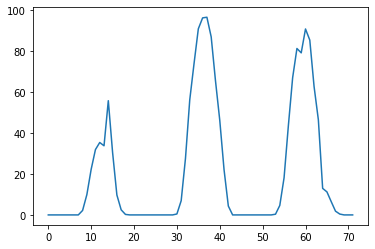

In [25]:
plt.plot(predict)

# 결과

In [26]:
result = data[data.quantity.isna()==True]
result.quantity = predict
result.to_csv('./result_과거발전량복원.csv')

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
